### Code : Ch4_신경망 학습
- Book : Deep Learning from Scratch 1
- Writer : Donghyeon Kim

#### 4.2. 손실 함수(loss function)

In [2]:
## 4.2.1. 오차제곱합(SSE)
import numpy as np

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # One-Hot Encoding

In [4]:
# Example 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
# Example 2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

In [7]:
## 4.2.2. 교차 엔트로피 오차(CEE)
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [8]:
# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # One-Hot Encoding

In [9]:
# Example 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [10]:
# Example 2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [11]:
## 4.2.3. 미니배치 학습
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [13]:
np.random.choice(60000, 10) # random choice

array([10958, 48681, 11688, 24085, 16082, 25645, 43420, 17240, 39783,
       40265])

#### 4.3. 수치 미분(numerical differentiation)

In [14]:
# 중심 차분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [15]:
# Example 1 : 2차 함수 미분(quadratic function differentiation)
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [17]:
print(numerical_diff(function_1, 5)) # 해석적 해 = 0.2
print(numerical_diff(function_1, 10)) # 해석적 해 = 0.3

0.1999999999990898
0.2999999999986347


In [18]:
# Example 2 : 편미분(partial differentiation)
def function_2(x):
    return x[0]**2 + x[1]**2

In [20]:
# 문제 1 : x0 = 3, x1 = 4일 때, x0에 대한 편미분?
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [21]:
# 문제 2 : x0 = 3, x1 = 4일 때, x1에 대한 편미분?
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

#### 4.4. 기울기(gradient)

In [22]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
    
    return grad

In [23]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [25]:
# np.zeros_like?
# shape가 같고 그 원소가 모두 0인 array임.

# example
print(np.zeros_like([3.0, 0.0]))
print(np.zeros_like([1.0, 2.0, 3.0, 4.0, 5.0]))

[0. 0.]
[0. 0. 0. 0. 0.]


In [26]:
## 4.4.1. Gradient Descent
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [27]:
# 문제 : y = x0^2 + x1^2의 최솟값을 Gradient Method로 구하라.
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [28]:
# Learning Rate(학습률)가 너무 큰 예 : lr=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [29]:
# Learning Rate(학습률)가 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [30]:
## 4.4.2. 신경망에서의 기울기
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [33]:
net = simpleNet()
print(net.W) # 가중치 매개변수

[[ 0.15453993 -1.39106706 -0.06065206]
 [-0.56167546  0.05883544  1.09075052]]


In [34]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p) # 신경망이 예측한 값(출력값)
print(np.argmax(p)) # 최댓값의 인덱스

[-0.41278396 -0.78168834  0.94528423]
2


In [35]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t) # 손실함수의 값

0.36115008156849115

In [36]:
# Gradient?
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10752368  0.07435171 -0.18187539]
 [ 0.16128552  0.11152757 -0.27281309]]


#### 4.5. 학습 알고리즘 구현하기(algorithms)

In [37]:
## 4.5.1. 2층 신경망 클래스 구현하기
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7847, 0.7899
train acc, test acc | 0.87815, 0.8819
train acc, test acc | 0.8978166666666667, 0.9015
train acc, test acc | 0.90895, 0.9102
train acc, test acc | 0.91495, 0.9175
train acc, test acc | 0.9196166666666666, 0.9223
train acc, test acc | 0.9233666666666667, 0.9261
train acc, test acc | 0.9281333333333334, 0.9292
train acc, test acc | 0.9314666666666667, 0.9328
train acc, test acc | 0.9341333333333334, 0.9353
train acc, test acc | 0.9364833333333333, 0.9374
train acc, test acc | 0.9391, 0.9388
train acc, test acc | 0.94165, 0.9415
train acc, test acc | 0.9437, 0.9426
train acc, test acc | 0.9449833333333333, 0.9428
train acc, test acc | 0.9472666666666667, 0.9462


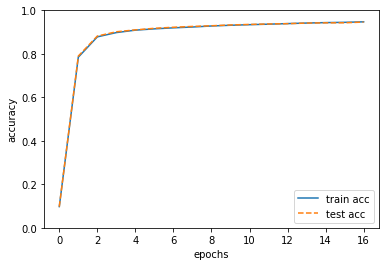

In [39]:
## 4.5.2. 미니배치 학습 구현하기
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()